# TP1 Transfert de chaleur en milieu poreux

__5 séances__

L'objectif est de développer un module python qui résout le transfert de chaleur en milieu poreux en régime transitoire thermique.


## 1. L'interface nappe-rivière en régime permanent

L'interface nappe-rivière est ici représentée par une portion de zone hyporhéique mono-dimensionnelle de hauteur h.

Le couple d'équations régissant le transfert de chaleur correspond d'une part à la résolution du régime permanent hydraulique (loi de Darcy):

$ \boldsymbol{q} = -K \boldsymbol{\nabla} H $

couplée à l'équation de transfert de chaleur

$ \rho_w c_w \boldsymbol{q} \cdot \boldsymbol{\nabla} \theta - \lambda_m \Delta \theta = 0 $


avec $\boldsymbol{q}$, le débit spécifique [$m.s^{-1}$],  
$H$, la charge [$m$]  
$K$, la perméabilité [$m.s^{-1}$],  
$\theta$, la température [$K$],  
$\rho_w$, la densité de l'eau [$kg.m^{-3}$],  
$c_w$ la capacité calorifique spécifique de l'eau [$J.kg^{-1}.K^{-1}$],  
$\lambda_m$ [$W.m^{-1}.K^{-1}$] la conductivité thermique du milieu poreux équivalent, avec $\lambda_m = \left( n \sqrt{\lambda_w} + (1-n) \sqrt{\lambda_s} \right)^2$ où $n$ est la porosité du milieu, et les indices $w$ et $s$ dénotent respectivement l'eau et le solide pur.

$\boldsymbol{\nabla}$ est un opérateur différenciel et $\Delta$ le Laplacien. 
Les symboles en gras représentent des vecteurs. 

Afin de rendre le programme générique permettant éventuelelment de prendre en compte les effets de température sur les propriétés de l'eau, la loi de Darcy est écrite dans sa version intrinsèque :

$ \boldsymbol{q} = - \frac{k \rho_w g}{\mu_w} \boldsymbol{\nabla} H $

avec where $k$ la perméabilité intrinsèque de l'eau [$m^2$],  
$g$ la constante gravitaire [$m.s^{-2}$],  
$\mu_w$ la viscosité dynamique de l'eau [$kg.s^{-1}$].


Le système expérimental MOLONARI (MOnitoring LOcal des échanges NAppe-RIvière) permet de mesurer la différence de pression entre le haut et le bas de la colonne.


### 1.1. Discrétiser l'équation en différences finies

Il s'agit ici de discrétiser l'équation du transfert de chaleur en régime permanent en différences finies.
Le problème est mono-dimensionnel vertical (une colonne de sol).

On considère un repère orienté vers le bas avec le 0 à la surface du sol.

Discrétiser les conditions limites de température qui sont imposées en haut et en bas de la colonne, soit aux faces.

On suppose que la colonne comprend n cellules, les conditions limites de température sont donc imposées aux faces 1/2 et n+1/2.





__Solution__ :

Le débit est constant tout au long de la colonne :

$ \boldsymbol{q} = -K_{eq} \frac{H_{top}-H_{bot}}{L} $,

L la longueur de la colonne de sol.


$ \rho_w c_w \boldsymbol{q} \cdot \boldsymbol{\nabla} \theta - \lambda_m \Delta \theta = 0 $

Soit $\kappa =  \frac{\lambda_m}{\rho_w c_w }$
alors $ \boldsymbol{q} \cdot \boldsymbol{\nabla} \theta - \kappa \Delta \theta = 0 $

__Discrétisation du premier terme__

$q_i \nabla \theta_i = q_i \frac{\theta_{i+1} - \theta{i-1}}{2 dz}$

dz longueur de la cellule,  

$q_i$ est la moyenne du débit aux faces: $q_i = \frac{q_{i+\frac{1}{2}}+ q_{i-\frac{1}{2}}}{2}$ 

Dans le cas permanent, ce débit est constant.

Si i est une cellule limite à température imposée alors i-1 devient i-1/2 et la formule :

$\nabla \theta_i = \frac{\theta_{i+1} - \theta{i-\frac{1}{2}}}{\frac{3}{2} dz}$

__Discrétisation du second terme__

$\Delta \theta_i = \nabla \nabla \theta_i$  
$\Delta \theta_i = \nabla \frac{\theta_{i+\frac{1}{2}} - \theta_{i-\frac{1}{2}}}{dz} $  
$\Delta \theta_i = \frac{\theta_{i+1} - 2 \theta_{i} + \theta{i-1}}{dz^{2}} $


Si i est une cellule limite à température imposée alors i-1 devient i-1/2  
$\Delta \theta_i = \nabla \frac{\theta_{i+\frac{1}{2}} - \theta_{i-\frac{1}{4}}}{\frac{3}{4}dz} $  
$\Delta \theta_i = \frac{4}{3 dz} [ \nabla \theta_{i+\frac{1}{2}} - \nabla \theta_{i-\frac{1}{4}} ] $   
$\Delta \theta_i = \frac{4}{3 dz} [ \frac{\theta_{i+1}-\theta_{i}}{dz} - 2 \frac{\theta_i - \theta_{i-\frac{1}{2}}}{dz} ] $  
$\Delta \theta_i = \frac{4}{3 dz^{2}} [ \theta_{i+1}-3 \theta_{i} + 2 \theta_{i-\frac{1}{2}} ] $  

__On obtient ainsi pour une cellule quelconque :__


$\theta_{i+1} - \theta_{i-1} - \frac{2 \kappa_i}{q_i dz} (\theta_{i+1} - 2 \theta_{i} + \theta_{i-1}) = 0$

$\boldsymbol{(q_i  - \frac{2 \kappa_i}{dz}) \theta_{i+1} + \frac{4 \kappa_i}{dz} \theta_{i}  - (q_i  +  \frac{2 \kappa_i}{dz}) \theta_{i-1} = 0}$

__Et pour une cellule limite à température imposée__  


$q_i (\frac{\theta_{i+1} - \theta{i-\frac{1}{2}}}{\frac{3}{2} dz}) - \kappa_i \frac{4}{3 dz^{2}} (\theta_{i+1}-3 \theta_{i} + 2 \theta_{i-\frac{1}{2}}) = 0$


$\theta_{i+1} - \theta_{i-\frac{1}{2}} - \frac{2 \kappa_i}{q_i  dz} ( \theta_{i+1}-3 \theta_{i} + 2 \theta_{i-\frac{1}{2}} ) = 0$


$\theta_{i+1} - \frac{2 \kappa_i}{q_i  dz} ( \theta_{i+1}-3 \theta_{i} ) = \theta_{i-\frac{1}{2}} + \frac{4 \kappa_i}{q_i  dz} + \theta_{i-\frac{1}{2}} $


$\boldsymbol{(q_i   - \frac{2 \kappa_i}{ dz} ) ( \theta_{i+1}) + \frac{6 \kappa_i}{ dz} \theta_{i}  = (q_i  + \frac{4 \kappa_i}{dz} )\theta_{i-\frac{1}{2}}} $

### 1.2. Formalisation du maillage, des variables d'état et des paramètres

En python, formaliser le maillage, identifier les variables d'état, les paramètres et les conditions limites.
Ecrire le code nécessaire à la lecture de ces données.

On considère une colonne de sol de 1 m d'épaisseur. La discrétisation mobilise des cellules de 1cm de côté.

La différence de charge entre le haut et le bas de la colonne est donnée par le système MOLONARI. Elle vaut 5cm.

Les propriétés de la colonne de sol sont dans un premier temps :

"permeability" : {  
            "val": "1e-5",  
            "unit": "m/s"  
        },  
        "porosity" : {  
            "val" : "0.15"  
        }  

"sediment": {  
        "specificHeatCapacity" : {  
            "val": "957",  
            "unit" : "m2 s-2 K-1"  
        },  
        "lambda" : {  
            "val": "2",   
            "unit": "W m-1 K-1"  
        },  
        "rho" : {  
            "val" : "2600",  
            "unit" : "kg/m3"  
        }  
    }  

"Triv" : {  
        "val" : 29,  
        "unit" : "°C"  
    },  
"Taq" : {  
        "val" : 12,  
        "unit" : "°C"  
    }  


#### 1.2.1 Les classes considérées

La classe principale est la classe Column. Elle mobilise de nombreuses autres classes :

+ Point dans geometry.py 
+ Geometry dans geometry.py 
+ Face  dans geometry.py 
+ Cell  dans geometry.py 
+ PropPorousMedia  dans porousMedia.py 
+ PropHydro dans hydrogeology.py 
+ PropMedia dans heat.py 
+ Hydro dans hydrogeology.py 
+ Heat dans heat.py 
+ BoundaryConditionHyd  dans hydrogeology.py 
+ BoundaryConditionHeat dans heat.py 
+ LinSys dans linearAlgebra.py 

L'ensemble des fichiers *.py sont regroupés pour former un package dans le répertoire codepyheat. Ce package est initialisé par __init__.py qui permet de définir les paths relatifs, les CONST et les functions pour les imprimer en str. Le main.py peut ainsi être exécuté. Afin de rentre l'exécution du main encore plus générique, et surtout pour faire tourner les *.py de codepyheat indépendemment, il faut définir une variable globale d'environnement, en ajoutant le chemin vers le projet (ie le parent de codepyheat) à PYTHONPATH.

Enfin le fichier units.py assure les convertions d'unités en ayant recours au fichier de configuration __convOpTable.json qui ne doit pas être modifié par les utilisateurs.

Afin de pouvoir faire tourner le code dans le jupyter notebook, il est nécessaire de tout d'abord définir une metaclasse utile à la lecture des fichiers. Nous reviendrons donc ultérieurement sur le code relatif aux classes.

#### 1.2.2 Instanciation des objets

L'instanciation des objet est basé sur la méthode __init__() de la classe correspondante. Par défaut, pour les classes qui nécessitent une définition par l'utilisateur, cette initialisation est basée sur l'utilisation d'un dictionary (dict). Afin de permettre une configuration aisée du code via des fichiers txt, il est possible de réaliser l'instanciation par le biais d'un fichier JSON. La définition de la méthode de classe d'instanciation par lecture de fichier est écrite dans factory.py : FactoryClass. Elle utilise des décorateurs et requière de ses héritiers de spécifier obligatoirement une méthode __init__ qui pourra être decorée par les méthodes méthodes de FactoryClass. Les classes dont les instances requiert une lecture de fichiers héritent de FactoryClass.  


#### 1.2.3 La Classe Column

Elle contient l'ensemble des autres Classes et des methodes pour effectuer le calcul direct.
Auparavant définir PYTHONPATH here:

In [1]:
"""
    @author: Nicolas Flipo
    @date: 11.02.2021

    contains the main class Column that contains everything needed to
        run a simulation.
    Column is the most import class of pyHeat

    Classes Point, Geometry are important for the mesh definition,
        and maybe raster type plots
    Classes Cell and Face are functional objects that contains state
        variable Classes (Hydro and Heat)

    For this file to work autonomously, it is required to add the parent
        directory to the environment variable PYTHONPATH:
        export PYTHONPATH = $PYTHONPATH:<parent_dir>

    The Column is orientated downwards with the origin being the top

"""

import sys
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import math

from codepyheat.factory import FactoryClass
from codepyheat import (X, Z, NDIM, N, S, complement, printDir, printDirCard,
                        caracItSteadyTemplate, caracParamTemplate, CODE_HEAT,
                        CODE_HYD, JSONPATH, BcHydPermTemplate, BcTempPermTemplate)
from codepyheat.units import calcValMult
from codepyheat.heat import Heat, BoundaryConditionHeat, BoundConditionSinus
from codepyheat.hydrogeol import Hydro, BoundaryConditionHyd 
from codepyheat.porousMedia import PropPorousMedia, LAMBDAW
from codepyheat.linearAlgebra import LinSys
from codepyheat.analSol import AnalSolution, calcki



class Point:

    def __init__(self, x, z):
        self.x = x
        self.z = z

    def __str__(self) -> str:
        return "({},{}  {})".format(self.x, self.z, super.__str__(self))


class Geometry:
    area = 0

    def __init__(self, center, lenTuple):
        self.center = center
        self.lenTuple = lenTuple

    def getArea(self):
        if self.area == 0:
            self.area = self.lenTuple[X]*self.lenTuple[Z]
        return self.area
        # return self.lenTuple[X]*self.lenTuple[Z]


class Face:
    def __init__(self, id, length, dist):
        self.len = length
        self.dist = dist  # dist to next cell center
        # used for physical problem solving
        self.hydro = Hydro()
        self.heat = Heat()
        self.id = id


class Cell:
    def __init__(self, id, Center, SideLenTuple):
        self.id = id
        self.geom = Geometry(Center, SideLenTuple)
        self.face = [[], []]
        for i in range(NDIM):
            # self.face[i] = []
            for j in range(NDIM):
                idFace = "{}{}{}".format(id, printDir(i), printDirCard(i, j))
                self.face[i].append(
                    Face(idFace, SideLenTuple[complement(i)], SideLenTuple[i])
                )
        self.hydro = Hydro()
        self.heat = Heat()

    def getFace(self, dir, num):
        return self.face[dir][num]


class Column(FactoryClass):
    """
        instantiate with
            - Column(a_dict)
            - Column.fromJsonFile(full path and file name)
            - Column.fromJsonString(valid json string)

    """
    def __init__(self, a_dict):

        depth = calcValMult(a_dict['depth'], "depth")
        ncells = a_dict['ncells']

        self.depth = depth
        self.ncells = ncells
        self.sidelen = depth/ncells
        self.allocAndInitGeomCells()
        self.dh = CODE_HYD  # Hydraulic gradient driving the flow in the
        # Column. The elevation reference is the bottom of the column
        self.tempRiv = CODE_HEAT
        self.tempAq = CODE_HEAT
        self.ls = LinSys(self.ncells)


    def printProps(self):
        print('Caracteristics of the soil column:')
        print('\tdepth {} m'.format(self.depth))
        print('\tdepth', self.depth, 'm')
        print('\t', self.ncells, 'cells of side size', self.depth/self.ncells,
              'm')

    def allocAndInitGeomCells(self):
        sidelen = self.depth / self.ncells
        # print('side size', sidelen, 'm')
        xcoord = 0
        self.cell = []
        ncells = self.ncells
        for i in range(ncells):
            zcoord = i * sidelen  
            side_length = (sidelen, sidelen)
            self.cell.append(Cell(i, Point(xcoord + side_length[X]/2, zcoord +
                             side_length[Z]/2), side_length))

    def initColumnHydrostatique(self, H):
        for i in range(self.ncells):
            cell = self.cell[i]
            cell.hydro.h = H
            for k in range(NDIM):
                cell.face[Z][k].hydro.h = H

    def setBcHyd(self, name):
        bchyd = BoundaryConditionHyd.fromJsonFile(name)
        self.setBcHydObj(bchyd)
        
    def setBcHydObj(self, bchyd):
        self.dh = bchyd.dh
        cell = self.cell[0]
        cell.hydro.setDirichletCell(Z, N)  
        face = cell.getFace(Z, N)  
        # face.hydro.setDirichletFace(0) 
        face.hydro.setDirichletFace(self.dh) 
        cell = self.cell[self.ncells - 1]
        cell.hydro.setDirichletCell(Z, S)
        face = cell.getFace(Z, S)
        # face.hydro.setDirichletFace(self.dh)
        face.hydro.setDirichletFace(0)

    def setBcT(self, name):
        bcT = BoundaryConditionHeat.fromJsonFile(name)
        self.setBcTObj(bcT)
        
    def setBcTObj(self, bcT):
        self.tempAq = bcT.tempAq
        self.tempRiv = bcT.tempRiv
        cell = self.cell[0]
        cell.heat.setDirichletCell(Z, N)
        face = cell.getFace(Z, N)
        # face.heat.setDirichletFace(self.tempAq)
        face.heat.setDirichletFace(self.tempRiv)
        cell = self.cell[self.ncells - 1]
        cell.heat.setDirichletCell(Z, S)
        face = cell.getFace(Z, S)
        # face.heat.setDirichletFace(self.tempRiv)
        face.heat.setDirichletFace(self.tempAq)

    def setHomogeneousPorMed(self, name):
        propPorMed = PropPorousMedia.fromJsonFile(name)
        self.setHomogeneousPorMedObj(propPorMed)
        
    def setHomogeneousPorMedObj(self, propPorMed):
        # propPorMed.printProps()
        self.physProp = propPorMed

    def solveDarcy(self):
        gradH = - self.dh / self.depth
        for i in range(self.ncells):
            self.cell[i].hydro.calcU(gradH, self.physProp.getUpperK())

    def solveHydSteadyHeatSteady(self):
        self.solveDarcy()
        self.fillLinSysT()
        self.ls.solveSysLin()
        upperT = []
        # print(self.ls.x)
        for i in range(self.ncells):
            cell = self.cell[i]
            cell.heat.upperT = self.ls.x[i]
            upperT.append(cell.heat.upperT)
            cell.heat.specificHeatFlux = cell.heat.upperT * cell.hydro.upperU       
        upperT = list(np.concatenate(upperT).flat)  # NF creates a real vector 
        # and not a list of arrays of dim 1
        return upperT

    def fillLinSysT(self):
        self.solveDarcy()
        kappa = self.physProp.kappa
        kappa /= self.sidelen
        kappa *= 2
        ls = self.ls
        for i in range(self.ncells):
            l1 = l2 = l3 = r = CODE_HYD
            cell = self.cell[i]
            q = cell.hydro.upperU
            if cell.hydro.type == 'regular':
                l3 = q - kappa  # i+1
                l2 = 2 * kappa  # i
                l1 = - (q + kappa)  # i-1
                r = 0
            else:
                l2 = 3 * kappa  # i
                if cell.hydro.type == 'BcDirichlet, face -> ZN': 
                    l3 = q - kappa  # i+1
                    r = (q + 2 * kappa) * cell.face[Z][N].heat.upperT 
                elif cell.hydro.type == 'BcDirichlet, face -> ZS': 
                    l1 = - (q + kappa)  # i-1
                    r = - (q - 2*kappa) * cell.face[Z][S].heat.upperT  
                    # Calculate it explicitly
            ls.setLhsVal(i, i-1, l1)
            ls.setLhsVal(i, i, l2)
            ls.setLhsVal(i, i+1, l3)
            ls.setRhsVal(i, r)

    def setNameOutputT(self, it):
        pathlib.Path("./output").mkdir(parents=True, exist_ok=True)
        if it != "NONE":
            str = "./output/T{}.csv".format(it)
        else:
            str = "./output/T0.csv".format(it)
        return str

    def printFileT(self, file):
        original_stdout = sys.stdout
        sys.stdout = file
        for i in range(self.ncells):
            cell = self.cell[i]
            # print(-i*cell.geom.lenTuple[Z], ',', float(cell.heat.upperT)) 
            print(-cell.geom.center.z, ',', float(cell.heat.upperT)) 
        file.close()
        sys.stdout = original_stdout

    def printT(self):
        str = 'NONE'
        self.iterativePrintT(str)

    def iterativePrintT(self, it):
        with open(self.setNameOutputT(it), 'w') as file:
            self.printFileT(file)

    def plotT(self):
        str = 'NONE'
        self.iterativePlotT(str)


    def iterativePlotT(self, it):
        data = np.genfromtxt(self.setNameOutputT(it), delimiter=',')
        plt.plot(data[:, 1], data[:, 0])
        plt.xlabel("Température in K")
        plt.ylabel("depth in m")
        plt.show()

    def setParamSteady(self, upperK, lambd, porosity, verbose):
        physP = self.physProp
        physP.setPermeability(upperK)
        if verbose:
            print("\tPhysical properties :")
            print(caracParamTemplate.format('\t\tpermeability:',
                  physP.getUpperK(), 'm s-1'))

        physP.setPorosity(porosity)     # Used in the lambda_eq formula
        if verbose:
            print(caracParamTemplate.format(
                '\t\tporosity', physP.getPorosity(), '--')
            )

        physP.setLambda(lambd)
        if verbose:
            print(caracParamTemplate.format(
                '\t\tequivalent thermal conductivity:',
                physP.getLambdaEq(LAMBDAW, physP.getPorosity()),
                'W m-1 K-1')
            )

        physP.setEffectiveParams()  # calculates kappa

    def generateZAxis(self):
        z = []
        for i in range(self.ncells):
            cell = self.cell[i]
            z.append(-cell.geom.center.z)
        return z

    def runForwardModelSteadyState(
            self,
            upperK,
            lambd,
            porosity,
            verbose=True,
            export=True,
            draw=True):

        """
            parameters of the sensitivity analysis and bayesian inversion:
            - permeability, thermal conductivity, porosity
        """

        if verbose:
            print("Running pyHeat in steady state with the following specs:")
            self.printBcHydSteady()
            self.printBcTempSteady()

        self.setParamSteady(upperK, lambd, porosity, verbose)
        upperT = self.solveHydSteadyHeatSteady()     # runs the fwd model
        if export:
            physP = self.physProp
            it = caracItSteadyTemplate.format(
                physP.getUpperK(), physP.getLambda(), physP.getPorosity()
            )
            self.iterativePrintT(it)
            if draw:
                # impossible to draw without export.
                # Draw is therefore conditional to the export
                self.iterativePlotT(it)   
        return upperT

    def setParamAnalSolution(self,period):
        pi = math.pi
        alpha = self.physProp.alpha 
        kappa = self.physProp.kappa
        gradH = self.dh / self.depth
        vt =  - alpha * gradH
        k1 = 1 / (2 * kappa)
        k2 = ( 8 * pi *kappa ) / period
        k3 = pow(vt, 4) + pow(k2, 2)
        k4 = pow(k3, 1/2)
        ka = k4 + pow(vt, 2)
        ka = calcki()(ka)
        kb = k4 - pow(vt, 2)
        kb = calcki()(kb)
        b = k1 * kb
        a = k1 * (ka - vt)
        print(vt,a,b)
        self.physProp.b =  b 
        self.physProp.a =  a
        print(vt,self.physProp.a,self.physProp.b)

    def printBcHydSteady(self):
        print(BcHydPermTemplate.format(self.dh))

    def printBcTempSteady(self):
        print(BcTempPermTemplate.format(self.tempRiv,self.tempAq))

    

if __name__ == '__main__':
    col = Column.fromJsonFile(JSONPATH + 'configColumn.json')
    col.printProps()


Caracteristics of the soil column:
	depth 1.0 m
	depth 1.0 m
	 100 cells of side size 0.01 m


Les fichiers de configuration json sont tous contenus dans le répertoire json de codepyheat

Le premier configColumn.json décrit la géométrie de la colonne :  
{  
    "depth": {  
            "val": "100",  
            "unit": "cm"  
        },  
    "ncells": 100    
}  

Le second paramColumn.json décrit les noms des fichiers décrivant les propriétés de la colonne :  
{  
    "name": "Soil Column",  
    "hydroFile": "paramHyd.json",  
    "sedFile": "paramSed.json"    
}  

paramHyd.json décrit les propriétés hydrodynamiques :  
{  
    "hydro": {   
        "permeability" : {  
            "val": "1e-5",  
            "unit": "m/s"  
        },  
        "porosity" : {  
            "val" : "0.15"  
        }  
    }  
}  

paramSed.json, les propriétés thermiques des grains du milieu poreux:  
{    
    "sediment": {  
        "specificHeatCapacity" : {  
            "val": "957",  
            "unit" : "m2 s-2 K-1"  
        },  
        "lambda" : {  
            "val": "2",   
            "unit": "W m-1 K-1"  
        },  
        "rho" : {  
            "val" : "2600",  
            "unit" : "kg/m3"  
        }  
    }  
}  

Les conditions limites hydrauliques et thermiques sont contenues respectivement dans :
+ configBcHydro :  
{  
    "dH" : {  
        "val": 5,  
        "unit": "cm"  
    }  
}   

+ et configBcTemp :  
{  
    "Triv" : {  
        "val" : 29,  
        "unit" : "°C"  
    },  
    "Taq" : {  
        "val" : 12,  
        "unit" : "°C"  
    }  
}  




### 1.4. Sorties du code

Ecrire les champs de températures dans un fichier.
Ecrire une procédure de visualisation des champs de température. On pourra se baser ici sur matplotlib



Les méthodes d'impression et de visualisation sont définies dans geometry.py. Il est possible de les lancer via un script python basé sur le package codepyheat.

Caracteristics of the soil column:
	depth 1.0 m
	depth 1.0 m
	 100 cells of side size 0.01 m
	Hydraulic Properties of porous media Unknown
		permeability or hydraulic conductivity: 8.000e-04 m s-1
		porosity: 1.500e-01 --
	Thermal Properties of the phase (pure solid) Soil Column
		thermal conductivity:: 2.000e+00 W m-1 K-1
		specific heat capacity:: 9.570e+02 m2 s-2 K-1
		density:: 2.600e+03 kg m-3
	equivalent parameters of  Soil Column :
		equivalent thermal conductivity: : 1.737e+00 W m-1 K-1
		equivalent heat capacity: : 2.743e+06 W m-1 K-1
	effective parameters of Soil Column:
		effective thermal conductivity: 4.151e-07 m2 s-1
		effective advective parameter: 1.221e-03 m s-1


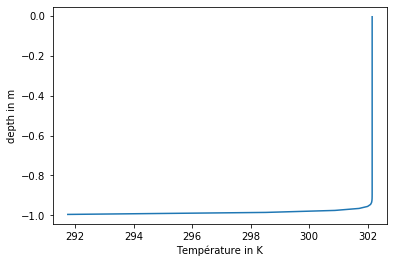

In [2]:
"""

    @author: Nicolas Flipo
    @date: 11.02.2021

    main file of pyHeat1D
    Everything is based on the Column class in geometry.py
        1.  initialisation from a JSON file
        2.  setting up the properties of the porous medium with JSON files
        3.  setting up the boundary conditions (hydraulique and thermal) with
            JSON files
        4.  solving the problem and printing and plotting the results
        5.  setting up other parameter values and solving again

"""
from codepyheat.geometry import Column
from codepyheat import JSONPATH

# step 1
rivBed = Column.fromJsonFile(JSONPATH + "configColumn.json")
rivBed.printProps()

# step 2
rivBed.setHomogeneousPorMed(JSONPATH + "paramColumn.json")
rivBed.physProp.printProps()

# step 3
rivBed.setBcHyd(JSONPATH + "configBcHydro.json")
rivBed.setBcT(JSONPATH + "configBcTemp.json")

# step 4 solving the problem and printing and plotting the results

rivBed.solveHydSteadyHeatSteady()
rivBed.printT()
rivBed.plotT()

### 1.5. Ecrire une fonctionnalité du code permettant l'analyse de sensibilité

Il s'agit d'écrire une méthode permettant de lancer un calcul direct en spécifiant les valeurs des trois paramètres intervenant dans le système d'équations : 
+ la perméabilité 
+ la conductivité thermique 
+ la porosité cinématique



Running pyHeat in steady state with the following specs:
	Hydraulic Boundary Conditions:
		differential pressure head (top - bottom) = 0.05 m
	Temperature Boundary Conditions:
		Triv = 302.15 K
		Taq = 285.15 K
	Physical properties :
		permeability:: 1.000e-03 m s-1
		porosity: 1.000e-01 --
		equivalent thermal conductivity:: 1.823e+00 W m-1 K-1
Running pyHeat in steady state with the following specs:
	Hydraulic Boundary Conditions:
		differential pressure head (top - bottom) = 0.05 m
	Temperature Boundary Conditions:
		Triv = 302.15 K
		Taq = 285.15 K
	Physical properties :
		permeability:: 1.000e-05 m s-1
		porosity: 1.000e-01 --
		equivalent thermal conductivity:: 1.823e+00 W m-1 K-1
Running pyHeat in steady state with the following specs:
	Hydraulic Boundary Conditions:
		differential pressure head (top - bottom) = 0.05 m
	Temperature Boundary Conditions:
		Triv = 302.15 K
		Taq = 285.15 K
	Physical properties :
		permeability:: 1.000e-07 m s-1
		porosity: 1.000e-01 --
		equivalent

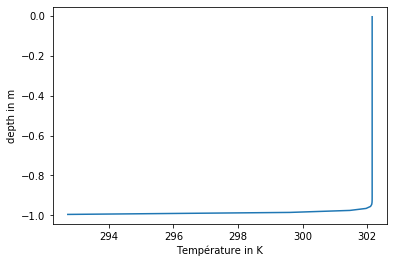

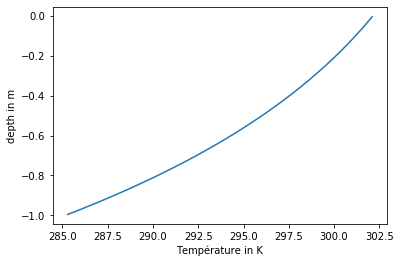

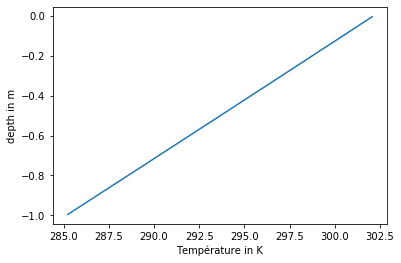

In [3]:

# step 5 running forward model with other parameter values

rivBed.runForwardModelSteadyState(1e-3, 2, 0.1)

rivBed.runForwardModelSteadyState(1e-5, 2, 0.1)

rivBed.runForwardModelSteadyState(1e-7, 2, 0.1)
# rivBed.iterativePlotT(caracItSteadyTemplate.format(rivBed.physProp.upperK,rivBed.physProp.lambd,rivBed.physProp.n))

print('End of simulation pyHeat steady')


## 2. Régime thermique transitoire


### 2.1 Forme générale


On considère la convention de notation suivante. $\boldsymbol{\nabla}$ est un opérateur différenciel et $\Delta$ le Laplacien. 
Les symboles en gras représentent des vecteurs. 

L'interface nappe-rivière est ici représentée par une portion de zone hyporhéique mono-dimensionnelle de hauteur h.

Le couple d'équations régissant le transfert de chaleur correspond d'une part à la résolution du régime permanent hydraulique (loi de Darcy):

$ \boldsymbol{q} = -K \boldsymbol{\nabla} H $

avec $\boldsymbol{q}$, le débit spécifique [$m.s^{-1}$],  
$H$, la charge [$m$]  
$K$, la perméabilité [$m.s^{-1}$],

Le système expérimental MOLONARI (MOnitoring LOcal des échanges NAppe-RIvière) permet de mesurer la différence de pression entre le haut et le bas de la colonne, qui est ainsi une donnée d'entrée du problème. A perméabilité considérée homogène le long de la colonne, le débit est ainsi évaluable pour le couplage avec l'équation de transfert de chaleur en régime permanent :

$\rho_m c_m \dfrac{\partial \theta}{\partial t} = - \rho_w c_w \boldsymbol{q} \cdot \boldsymbol{\nabla} \theta + \lambda_m \Delta \theta$

avec $\theta$, la température [$K$],  
$\rho_i$, la densité de i [$kg.m^{-3}$],  
$c_i$ la capacité calorifique spécifique de i [$J.kg^{-1}.K^{-1}$],  
$\lambda_i$ [$W.m^{-1}.K^{-1}$] la conductivité thermique de i,
où $i \in {s,w,m}$, avec s solide, w eau, m milieu poreux equivalent. 

$c_m\rho_m$ est estimé à partir de moyenne volumique pondérée par la porosité $n$ du milieu, $ \rho_m c_m = n \rho_w c_w + (1 - n) \rho_s c_s $

La conductivité thermique du milieu poreux équivalent est estimée par la relation $\lambda_m = \left( n \sqrt{\lambda_w} + (1-n) \sqrt{\lambda_s} \right)^2$.

### 2.2 Réduction de l'espace des paramètres

L'équation de transport de la chaleur peut être réécrite sous la forme :


$ \dfrac{\partial \theta}{\partial t} = \kappa_e \Delta \theta + 
\alpha_e \boldsymbol{\nabla} H \cdot \boldsymbol{\nabla} \theta $

avec $ \kappa_e = \dfrac{\lambda_m}{ \rho_m c_m }  $

$ \alpha_e = \dfrac{\rho_w c_w}{ \rho_m c_m} K $


$\kappa_e$ [$m^2 s^{-1}$] et $\alpha_e$ [$m s^{-1}$] sont des paramètres effectifs, dénommés respectivement conductivité effective (parfois dénommée effective diffusivité thermique) et paramètre advectif effectif.

### 2.3 Propagation d'un signal périodique dans un milieu semi infini

Il existe une solution analytique, fournie par Stallman (1965), à la propagation d'un signal de température sinusoïdal  à la surface d'un milieu poreux soumis à une différence de pressions ($\Delta H$) constante au cours du temps. Le signal sinusoïdal est apliqué en haut de la colonne, dans un repère dont l'origine est en haut de la colonne et orienté vers le bas. Il a une amplitude  $\theta_{amp}$ et une période P autour d'une valeur moyenne $\theta_{\mu}$. Cette solution s'écrit :

$ \theta(z,t)  = \theta_{\mu} + \theta_{amp} e^{-az} \cos\left( \dfrac{2 \pi}{P} t - b z \right) $  [eq.1]

avec 
$ a  = \dfrac{1}{2 \kappa_e} \left( \sqrt{\dfrac{\sqrt{v_t^4 + (8 \pi \kappa_e / P)^2 } + v_t^2}{2}} - v_t \right) $, 

$ b  = \dfrac{1}{2 \kappa_e}  \sqrt{\dfrac{\sqrt{v_t^4 + (8 \pi \kappa_e / P)^2 } - v_t^2}{2}} $, 

$ v_t  = - \alpha_e \dfrac{\partial H}{\partial z} $


Dans le cas conductif pur, la solution analytique s'écrit:

$ \theta(z,t)  = \theta_{\mu} + \theta_{amp} e^{-\sqrt{\dfrac{\pi}{\kappa_e P}}z} \cos\left( \dfrac{2 \pi}{P} t - \sqrt{\dfrac{\pi}{\kappa_e P}} z \right) $  [eq.1cond]



### 2.4 Etude de cas

Considérons une colonne de sol de 8 m de profondeur avec la conductivité thermique équivalente $\lambda_m = 1 W.m^{-1}.K^{-1}$, la porosité $ n = 0.15$, et la capacité calorifique équivalente $\rho_m c_m =  4e6 J.m^{-3}.K^{-1}$. La perméabilité est fixée à $8.10^{-4} m.s^{-1}$. 

#### 2.4.1 Réponse de la zone hyporhéique à une sollicitation thermique périodique

On considère un signal périodique en surface d'amplitude 1 K et une période de 720 heures (30 jours) autour d'un température moyenne de 12 °C.

##### 2.4.1.1 Evolution de la température dans le milieu

Tracer le profil des températures toutes les 30 heures pour les trois cas suivants :

+ 1. vitesse de darcy vers le haut de 1e-6 $m. s^{-1}$
+ 2. profil conductif pur
+ 3.  vitesse de darcy vers le bas de 1e-6 $m. s^{-1}$

Avant de démarrer, écrire une méthode permettant de forcer une simulation à partir de paramètres thermiques équivalents (conductivité thermique et capacité calorifique).

Tracer également des frises temporelles représentant la matrice des températures dans l'espace (z,t). 

Commentez ces résultats.

__ *SOLUTION* __

Il convient pour résoudre ce problème d' écrire une méthode permettant de forcer une simulation à partir de paramètres thermiques équivalents (conductivité thermique et capacité calorifique). Cela est fait dans porousMedia.py avec l'ajout de la méthode getSedPropFromEquivProp(self, lambdm, rhomCm, n=POROSITY, rhos=RHOS) à la classe PropPorousMedia.

Voici un exemple d'execution du code :


Caracteristics of the soil column:
	depth 8.0 m
	depth 8.0 m
	 200 cells of side size 0.04 m
	Hydraulic Boundary Conditions:
		differential pressure head (top - bottom) = 0.01 m
	Temperature Boundary Conditions:
		Triv = 302.15 K
		Taq = 285.15 K
targeted values for porous medium:

	lambdam:  1
	rhomCm:  4000000.0
	Hydraulic Properties of porous media Unknown
		permeability or hydraulic conductivity: 8.000e-04 m s-1
		porosity: 1.500e-01 --
	Thermal Properties of the phase (pure solid) Undefined
		thermal conductivity:: 1.082e+00 W m-1 K-1
		specific heat capacity:: 1.587e+03 m2 s-2 K-1
		density:: 2.500e+03 kg m-3
	equivalent parameters of  Undefined :
		equivalent thermal conductivity: : 1.000e+00 W m-1 K-1
		equivalent heat capacity: : 4.000e+06 W m-1 K-1
	effective parameters of Undefined:
		effective thermal conductivity: 2.389e-07 m2 s-1
		effective advective parameter: 8.370e-04 m s-1


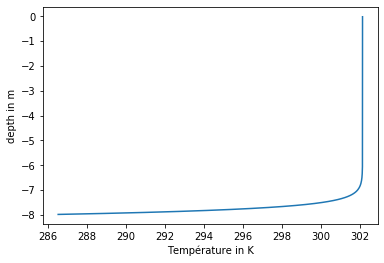

In [4]:
from codepyheat.geometry import Column
from codepyheat import JSONPATH
from codepyheat.hydrogeol import BoundaryConditionHyd
lambdm = 1
rhomCm = lambdm / 2.5e-7

dico = {
    "depth": {
            "val": "8",
            "unit": "m"
        },
    "ncells": 200
}

rivBed = Column(dico)
rivBed.setHomogeneousPorMed(JSONPATH + "paramColumn.json")
dicoBc =  {
    "dH" : {
        "val": 1,
        "unit": "cm"
        }
}
bchyd = BoundaryConditionHyd(dicoBc)
rivBed.setBcHydObj(bchyd)
rivBed.setBcT(JSONPATH + "configBcTemp.json")

rivBed.printProps()
rivBed.printBcHydSteady()
rivBed.printBcTempSteady()

rivBed.physProp.getSedPropFromEquivProp(lambdm,rhomCm)
rivBed.physProp.printProps()

rivBed.solveHydSteadyHeatSteady()
rivBed.printT()
rivBed.plotT()

Il est alors possible de lancer les trois simulations dans une boucle. 

In [5]:
from codepyheat.units import NSECINDAY, NSECINHOUR
from codepyheat.geometry import Column
from codepyheat import JSONPATH
from codepyheat.hydrogeol import BoundaryConditionHyd
import matplotlib.pyplot as plt
import numpy as np
import math

# step 1 setting up the problem
lambdm = 1
rhomCm = lambdm / 2.5e-7
dj = 1.25
jf = 30
dt = dj * NSECINDAY
ndt = int( jf / dj )
valQ = [1e-6, 0, -1e-6]  # m/s
dico = {
    "depth": {
            "val": "8",
            "unit": "m"
        },
    "ncells": 200
}
rivBed = Column(dico)
rivBed.setHomogeneousPorMed(JSONPATH + "paramColumn.json")
rivBed.printProps()
rivBed.physProp.getSedPropFromEquivProp(lambdm,rhomCm)
rivBed.physProp.printProps()
upperK = rivBed.physProp.propH.upperK
allT = np.zeros((len(valQ),ndt,rivBed.ncells))
tempRiv = np.zeros((len(valQ),ndt))

# step 2 problem solving 
id = 0
for q in valQ:
    grad = -q / upperK
    dh = -grad * rivBed.depth
    dicoBc =  {
        "dH" : {
            "val": dh,
            "unit": "m"
            }
    }
    bchyd = BoundaryConditionHyd(dicoBc)
    rivBed.setBcHydObj(bchyd)
    rivBed.printBcHydSteady()
    [allT[id], tempRiv[id]] = rivBed.calcTandTrivFromBcTSinus(JSONPATH + "periodicBC.json",ndt,dt)
    id += 1
    rivBed.resetParamAnalSolution()


Caracteristics of the soil column:
	depth 8.0 m
	depth 8.0 m
	 200 cells of side size 0.04 m
targeted values for porous medium:

	lambdam:  1
	rhomCm:  4000000.0
	Hydraulic Properties of porous media Unknown
		permeability or hydraulic conductivity: 8.000e-04 m s-1
		porosity: 1.500e-01 --
	Thermal Properties of the phase (pure solid) Undefined
		thermal conductivity:: 1.082e+00 W m-1 K-1
		specific heat capacity:: 1.587e+03 m2 s-2 K-1
		density:: 2.500e+03 kg m-3
	equivalent parameters of  Undefined :
		equivalent thermal conductivity: : 1.000e+00 W m-1 K-1
		equivalent heat capacity: : 4.000e+06 W m-1 K-1
	effective parameters of Undefined:
		effective thermal conductivity: 2.389e-07 m2 s-1
		effective advective parameter: 8.370e-04 m s-1
	Hydraulic Boundary Conditions:
		differential pressure head (top - bottom) = 0.009999999999999998 m
0.6402897723714018 1.79262817595599 1.0462499999999997e-06
		setting up paramAnalSol for T calc, with tav 285.15 ampli 1.0  period 2592000.0
0.64028

On définit alors deux functions de tracé et une permettant de vérifier la condition limite rivière

In [6]:
# plotting Temperature boundary condition in the river
def plotRivt(valQ,ndt,tempRiv,dt,legend=True):
    t = []
    for i in range(ndt):
        t.append(i*dt/NSECINHOUR)

    fig, ax = plt.subplots(figsize=(6, 6))
    for id in range (len(valQ)):
        markers = [".","--","-."]
        l = len(markers)  
        plt.plot(t, tempRiv[id],markers[id%l],label=f"{valQ[id]}m/s")

    plt.ylabel("Température de la rivière (K)")
    plt.xlabel("heures")
    plt.title("Température de la rivière")
    if legend:
        plt.legend(loc='best', frameon=False)
    plt.show()
    
# step 3 plotting Temperature profiles
def plotTzt(rivBed,valQ,ndt,allT,dt,legend=True):
    z = rivBed.generateZAxis()
    for id in range (len(valQ)):
        markers = [".","--","-."]
        l = len(markers)
        fig, ax = plt.subplots(figsize=(6, 12))    
        for i in range(ndt):
            upperT = allT[id][i]
            #print("print h",i*dt/NSECINHOUR,upperT)
            plt.plot(upperT,z,markers[i%l],label=f"{i*dt/NSECINHOUR} hr")
        plt.ylabel("longueur colonne (m)")
        plt.xlabel("Température de l'eau (K)")
        plt.title("Températures au cours du temps, q = {} m.s-1".format(valQ[id]))
        if legend:
            plt.legend(loc='best', frameon=False)
        plt.show()

# step 4 generating 2D graphs
def plotFrise(ndt,rivBed,allT,valQ):
    z = rivBed.generateZAxis()
    days = []
    for p in range(ndt):
        days.append(p)
    #generating zaxis   
    zaxis = np.zeros((len(z)+1))
    dz = rivBed.sidelen/2
    zaxis[0] = z[0] - dz
    for j in range(len(z)):
        zaxis[j+1] = z[j] + dz

    taxis = np.zeros((ndt+1))
    dz = -0.5
    taxis[0] = -dz
    for j in range(ndt):
        taxis[j+1] = j + dz

    cmin = np.min(allT)
    cmax = np.max(allT)
    print(cmin,cmax)
    for ii in range(len(valQ)):
        fig, ax = plt.subplots()
        mat=allT[ii].transpose()
        cmap=plt.get_cmap('RdBu')
        im = ax.pcolormesh(taxis,zaxis,mat, cmap=cmap.reversed())
        str = "Temperature profiles for q = {:3.2e} m.s-1".format(valQ[ii])
        ax.set_title(str)
        ax.set_xlabel("days")
        ax.set_ylabel("depth in m")
        fig.colorbar(im, ax=ax)
        plt.show()  

On vérifie tout d'abord la condition limite en rivière

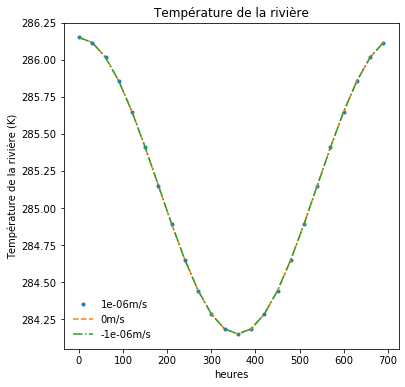

In [7]:
plotRivt(valQ,ndt,tempRiv,dt)

On peut ensuite tracer les profils de température

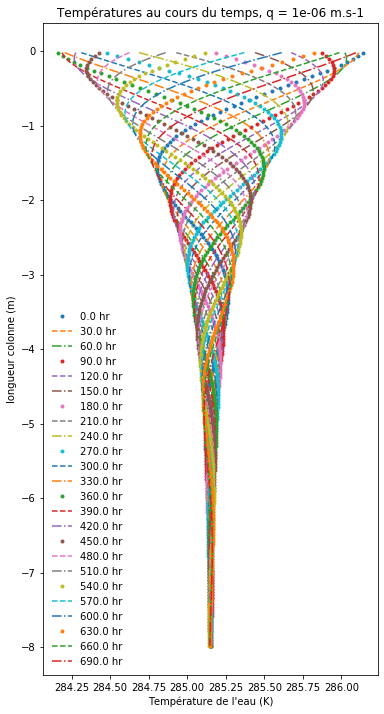

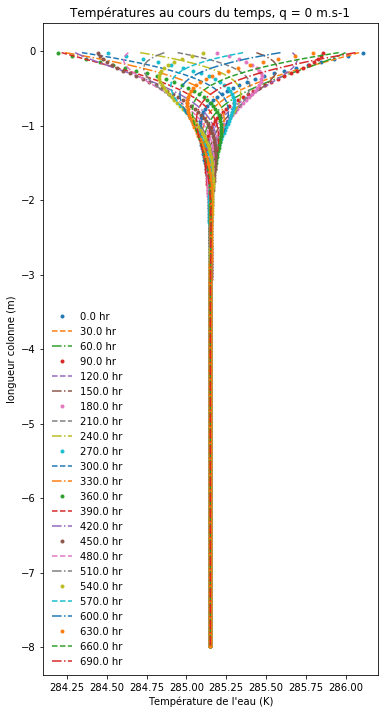

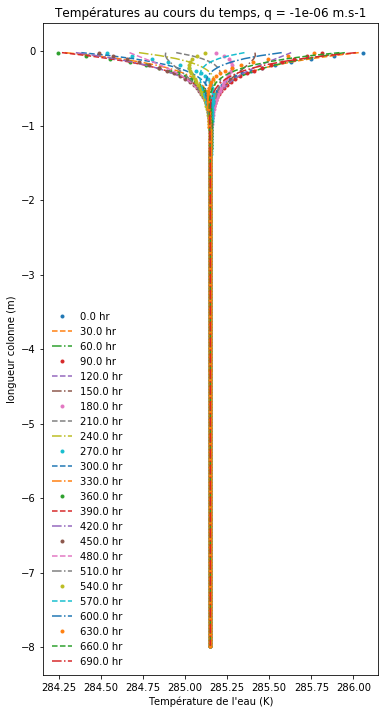

In [8]:
plotTzt(rivBed,valQ,ndt,allT,dt)

Et les frises

284.1633586074699 286.13664139253007


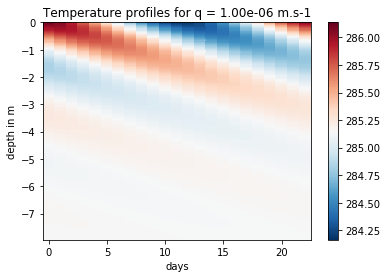

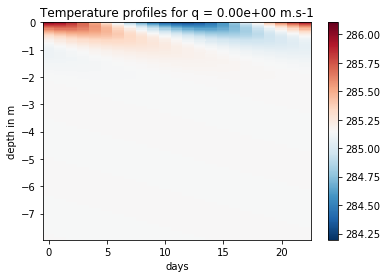

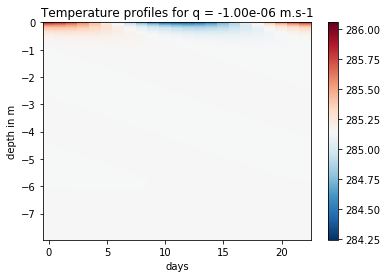

In [9]:
plotFrise(ndt,rivBed,allT,valQ)

##### 2.4.1.2 Quantifier et représentez les flux d'énergie relatifs à ces états thermiques

Tracer également des frises temporelles représentant les flux de chaleur advectifs et conductifs relatifs aux trois cas précédents. Commentez ces résultats.

__TO DO__

##### 2.4.1.3 Profondeur de pénétration

Par convention on considère que la profondeur de pénétration d'une onde est définie par la profondeur à partir de laquelle l'amplitude est amortie de $e^{-1}$, soit environ d'un tiers.

__Calculer la profondeur de pénétration__

On utilise l'équation [eq.1], qui donne la profondeur de penetration $z_p$:
$z_p = \dfrac{1}{a}$

soit 
$ z_p = \left[ \dfrac{1}{2 \kappa_e} \left( \sqrt{\dfrac{\sqrt{v_t^4 + (8 \pi \kappa_e / P)^2 } + v_t^2}{2}} - v_t \right) \right]^{-1} $

On pose $ \gamma  = \sqrt{v_t^4 + (8 \pi \kappa_e / P)^2 } $

Ainsi

$ z_p = \dfrac{2 \kappa_e}{\sqrt{\dfrac{\gamma + v_t^2}{2}} - v_t}$

__Tracer les profondeurs de pénétration__ pour des signaux périodiques dont la période varie entre 1hr et 1 an. Pour des vitesses descendantes, ascendantes variant en valeur absolue entre 10$^{-5}$ et 10$^{-8}$ m.s$^{-1}$. On utilisera des échelles log.

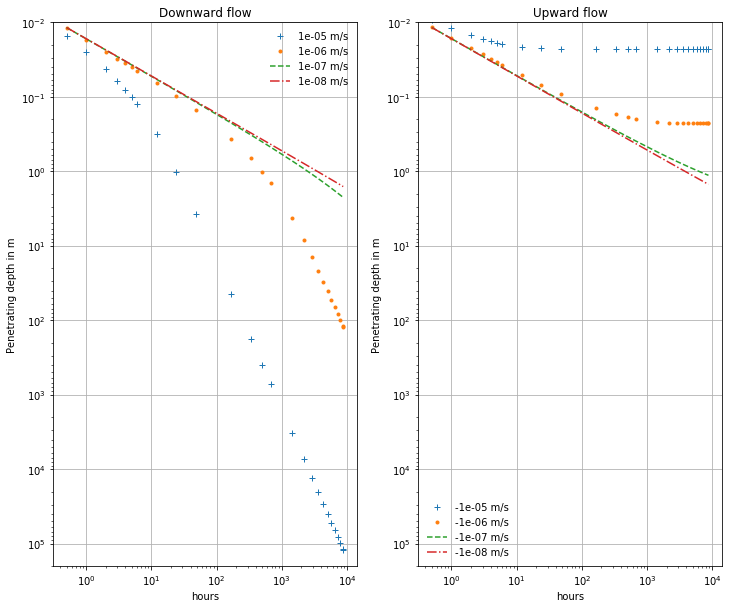

In [10]:
from codepyheat.units import NSECINHOUR

kappa = rivBed.physProp.kappa
alpha = rivBed.physProp.alpha
upperK = rivBed.physProp.propH.upperK

valQp = [1e-5, 1e-6, 1e-7, 1e-8]
coef = [1, -1]  # downward, upward

nhr = [0.5,1,2,3,4,5,6,12,24]
for nj in [2,7,14,21,28]:
    nhr.append(nj*24)
for nmonth in range(2,13,1):
    nhr.append(nmonth*24*30) 
nhr.append(365*24)

zp = np.zeros((len(coef),len(valQp),len(nhr)))
kk=0
for m in coef:
    ii = 0
    for q in valQp:
        grad = -q / upperK
        grad *= m
        jj = 0
        for p in nhr:
            vt = - alpha * grad
            #vt /= rivBed.depth
            gamma = ( 8 * math.pi *kappa ) / (p*NSECINHOUR)
            gamma = pow(gamma,2) + pow(vt,4)
            gamma = pow(gamma,0.5)
            numerator = 2 * kappa
            denom = (gamma + pow(vt,2))/2
            denom = pow(denom, 0.5)
            denom -= vt
            zp[kk][ii][jj] = numerator/denom
            jj += 1
        ii += 1
    kk += 1

fig, axs = plt.subplots(1, 2,figsize=(12, 10))
markers = ["+",".","--","-."]
l = len(markers)

for kk in range(len(coef)):
    if kk == 0:
        str = 'Downward flow'
    else:
        str = 'Upward flow'
    axs[kk].set_title("{}".format(str))
    axs[kk].set_xlabel("hours")
    axs[kk].set_ylabel("Penetrating depth in m")
    axs[kk].set_ylim(2e5,1e-2)
    axs[kk].grid(True)
    ii = 0
    m=coef[kk]
    for q in valQp:
        axs[kk].loglog(nhr,zp[kk][ii],markers[ii],label=f"{q*m} m/s")
        ii+=1
    axs[kk].legend(loc='best', frameon=False)

plt.show()

#print(zp)

##### 2.4.1.4 Temps d'arrivée d'une perturbation à une profondeur donnée

En analysant la composante ondulatoire de a solution analytique [eq.1], définir le __temps d'arrivée__ à une profondeur $z$ d'une perturbation de période $P$. En déterminer la vitesse la vitesse de propagation de l'onde.

__SOLUTION__

Le temps d'arrivée, $\tau$ correspond à cos = 1, 

soit $  \tau = \dfrac{Pbz}{2 \pi} $

La vitesse, $V$, s'exprime par $\dfrac{z}{\tau}$, soit :

$V = \dfrac{2 \pi}{Pb}$

Pour le cas conductif, on trouve :

$V = \sqrt{\dfrac{4 \pi \kappa_e}{P}}$

Il est intéressant de remarquer que $b$ ne dépendant pas du signe de q, la vitesse de propagation d'une onde de période P est la même que l'eau suive un mouvement ascendant ou descendant. Le sens du mouvement joue par contre sur l'amortissement comme remarqué précedemment. 

__Tracer les vitesses de propagation__ pour une gamme de vitesses variant entre 1e-5 m/s et 1e-8 m/s, et pour le cas conductif. Commentez vos résultats

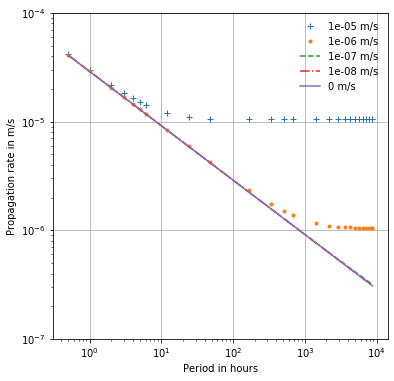

In [11]:
#step 7 propagation rates :
import math
from codepyheat.analSol import calcki

pi = math.pi
kappa = rivBed.physProp.kappa
alpha = rivBed.physProp.alpha
upperK = rivBed.physProp.propH.upperK

nhr = [0.5,1,2,3,4,5,6,12,24]
for nj in [2,7,14,21,28]:
    nhr.append(nj*24)
for nmonth in range(2,13,1):
    nhr.append(nmonth*24*30) 
nhr.append(365*24)

valQpr = [1e-5, 1e-6, 1e-7, 1e-8, 0]
pr = np.zeros((len(valQpr),len(nhr)))
ii = 0
for q in valQpr:
    jj = 0
    for p in nhr:
        period = p*NSECINHOUR
        if q > 1e-15:  
            vt = - alpha * q
            vt /= upperK 
            k1 = 1 / (2 * kappa)
            k2 = ( 8 * pi *kappa ) / period
            k3 = pow(vt, 4) + pow(k2, 2)
            k4 = pow(k3, 1/2)
            kb = k4 - pow(vt, 2)
            kb = calcki()(kb)
            b = k1 * kb
            valV = 2 * pi
            valV /= period * b
            rivBed.resetParamAnalSolution()
        else:
            valV = 4 * pi * kappa
            valV /= period
            valV = valV**0.5
        pr[ii][jj] = valV
        jj += 1
    ii += 1

fig, axs = plt.subplots(1, 1,figsize=(6, 6))
markers = ["+",".","--","-.","-"]
l = len(markers)
for kk in range(len(valQpr)):
    axs.loglog(nhr,pr[kk],markers[kk],label=f"{valQpr[kk]} m/s")   
#axs.set_title("Propagation rate")
axs.set_xlabel("Period in hours")
axs.set_ylabel("Propagation rate in m/s")
axs.set_ylim(1e-7,1e-4)
axs.grid(True)
axs.legend(loc='best', frameon=False)

plt.show()

#### 2.4.2 Sollicitations multi-périodiques
 
On considère maintenant deux signaux périodiques emboîtés, l'un annuel (d'amplitude 6 °C), l'autre journalier d'amplitude 1°C.

Représenter tout d'abord les deux influences séparemment puis voir comment elles se combinent dans le milieu pour les deux cas infliltrant et exfiltrant à une vitesse de Darcy de +/-1e-6 $m. s^{-1}$. Représentez les profils verticaux et les frises.

Commentez les résultats obtenus.

In [12]:
from codepyheat.units import NSECINDAY, NSECINHOUR
from codepyheat.geometry import Column
from codepyheat import JSONPATH
from codepyheat.hydrogeol import BoundaryConditionHyd
from codepyheat.heat import BoundConditionMultiSinus
import matplotlib.pyplot as plt
import numpy as np

#test forcing
dicoMultP = {
    "Taverage": {
        "val": 12,
        "unit": "°C"
    },
    "sinus": [ {
            "Tampli": {
                "val": 6,
                "unit": "K"
            },  
            "Period": {
                "val": 1,
                "unit": "yr"
            }
        },
        {
            "Tampli": {
                "val": 1,
                "unit": "K"
            },  
            "Period": {
                "val": 1,
                "unit": "j"
            }
        }
        ]
}

# step 1 setting up the problem
lambdm = 1
rhomCm = lambdm / 2.5e-7
dj = 3.75
jf = 366
dt = dj * NSECINDAY
ndt = int( jf / dj )

valQ = [1e-6, 0, -1e-6]  # m/s

dico = {
    "depth": {
            "val": "10",
            "unit": "m"
        },
    "ncells": 500
}
rivBed = Column(dico)
rivBed.setHomogeneousPorMed(JSONPATH + "paramColumn.json")
rivBed.printProps()
rivBed.physProp.getSedPropFromEquivProp(lambdm,rhomCm)
rivBed.physProp.printProps()
upperK = rivBed.physProp.propH.upperK
allT = np.zeros((len(valQ),ndt,rivBed.ncells))
tempRiv = np.zeros((len(valQ),ndt))

# step 2 problem solving 
id = 0
nampli = 1
for q in valQ:
    grad = -q / upperK
    dh = -grad * rivBed.depth
    dicoBc =  {
        "dH" : {
            "val": nampli*dh,
            "unit": "m"
            }
    }
    bchyd = BoundaryConditionHyd(dicoBc)
    rivBed.setBcHydObj(bchyd)
    rivBed.printBcHydSteady()
    bcts = BoundConditionMultiSinus(dicoMultP)
    [allT[id], tempRiv[id]] = [rivBed.calcTFromBcTSinusObj(bcts, ndt, dt), rivBed.calcBcTSinusObj(bcts, ndt, dt)]  
    id += 1
    rivBed.resetParamAnalSolution()


Caracteristics of the soil column:
	depth 10.0 m
	depth 10.0 m
	 500 cells of side size 0.02 m
targeted values for porous medium:

	lambdam:  1
	rhomCm:  4000000.0
	Hydraulic Properties of porous media Unknown
		permeability or hydraulic conductivity: 8.000e-04 m s-1
		porosity: 1.500e-01 --
	Thermal Properties of the phase (pure solid) Undefined
		thermal conductivity:: 1.082e+00 W m-1 K-1
		specific heat capacity:: 1.587e+03 m2 s-2 K-1
		density:: 2.500e+03 kg m-3
	equivalent parameters of  Undefined :
		equivalent thermal conductivity: : 1.000e+00 W m-1 K-1
		equivalent heat capacity: : 4.000e+06 W m-1 K-1
	effective parameters of Undefined:
		effective thermal conductivity: 2.389e-07 m2 s-1
		effective advective parameter: 8.370e-04 m s-1
	Hydraulic Boundary Conditions:
		differential pressure head (top - bottom) = 0.012499999999999997 m
0.008205070657708797 0.18972002159630053 1.0462499999999997e-06
		setting up paramAnalSol for T calc, with tav 285.15 ampli 6.0  period 31536000.0

97


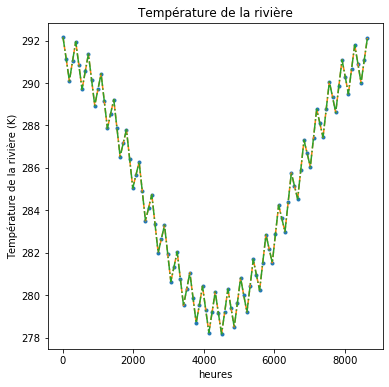

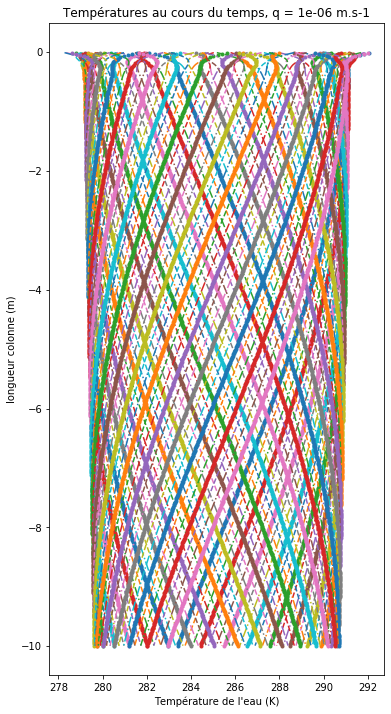

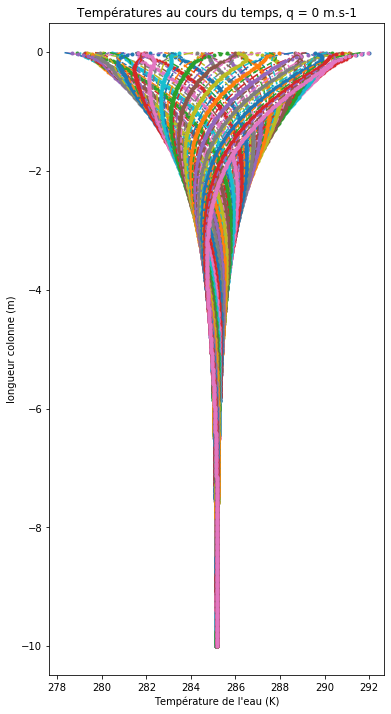

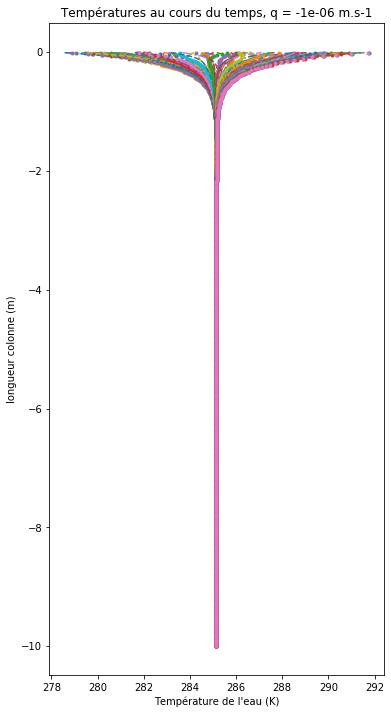

In [13]:
print(ndt)
if ndt > 15:
    plotRivt(valQ,ndt,tempRiv,dt,False)
    plotTzt(rivBed,valQ,ndt,allT,dt,False)
else:
    plotRivt(valQ,ndt,tempRiv,dt)
    plotTzt(rivBed,valQ,ndt,allT,dt)
    

278.27585330617813 292.04537730816173


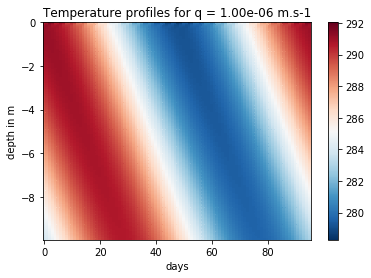

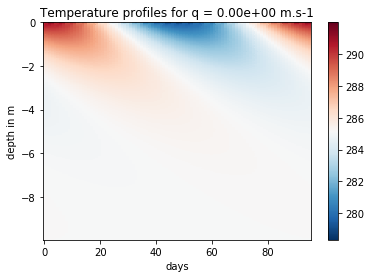

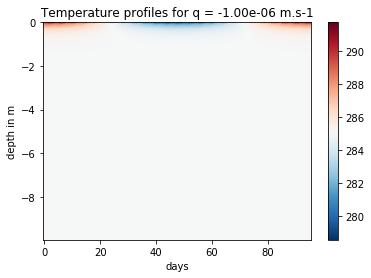

In [14]:
plotFrise(ndt,rivBed,allT,valQ)

## 3. Modèle direct hydro-thermique

Intégrer la résolution transitoire de l'équation de la diffusivité à votre code afin d'obtenir un code capable de résoudre le problème hydro-thermique complet.